# Business analýza

## Importy a načtení skladu

In [40]:
import os
import pandas
import random
import re

__file__ = __vsc_ipynb_file__  
SCRIPT_FOLDER = os.path.dirname(__file__)
PROJECT_FOLDER = os.path.dirname(SCRIPT_FOLDER)
DATA_FOLDER = os.path.join(PROJECT_FOLDER,'data')

COL_ID = 'pid'
COL_MODEL = 'Model'
COL_BEZDPH = 'bez_dph'
COL_SDPH = 's_dph'
COL_PRODUKT = 'Produkt'
COL_NAKUP = 'cena_nakup'
COL_SKLADEM = 'skladem'
COL_PRODANO = 'prodano'
COL_SKUPINA = 'skupina'
COL_HODNOTA = 'hodnota_na_sklade'
COL_VYNOS = 'vynos'
COL_ZISK = 'zisk'
COL_MARZE = 'marze'


## Načtení ceníků
### Kosmetika

In [41]:
file_kosm = r"C:\Users\Dorota\Desktop\datová analytika\working\data\source\sklad\cenik_kosmetiky.csv"

kosm_cfg = dict (
    #nrows=10,
    thousands=' ',
    usecols=[0,1,2,3],
    skiprows= 1,
    header= None,
    names=[COL_ID,COL_MODEL,COL_BEZDPH,COL_SDPH],
    index_col=[0]
    )

kosmetika = pandas.read_csv(file_kosm,**kosm_cfg)
kosmetika.info()
kosmetika

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 19106 to 16090
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    689 non-null    object 
 1   bez_dph  689 non-null    float64
 2   s_dph    689 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.5+ KB


,Model,bez_dph,s_dph
pid,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0
...,...,...,...
5014,LÁHEV 1 l - plast,17.36,21.0
KD090006,"TATSOI TANGA, PSP – DÁREK - 6 g",24.35,28.0
KD020005,"ŘEPA SANGRIA BÝČÍ KREV, PSP – DÁREK - 5 g",24.35,28.0


### Mobily

In [42]:
file_mobily = r"C:\Users\Dorota\Desktop\datová analytika\working\data\source\sklad\cenik_mobilnich_telefonu.csv"

mb_cfg = {
    #'nrows':10,
    'usecols':[0,7,8],
    'skiprows': 1,
    'header': None,
    'names':[COL_MODEL,COL_BEZDPH, COL_SDPH],
    #'skipfooter': 10
}

mobily = pandas.read_csv(file_mobily, **mb_cfg)

mobily.info()
mobily

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Model    118 non-null    object 
 1   bez_dph  118 non-null    float64
 2   s_dph    118 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


,Model,bez_dph,s_dph
0,TCL TAB 10 4G Dark Gray,3534.71,4277
1,Alcatel 1 2021 Volcano Black,1303.31,1577
2,Alcatel 2019G Metallic Gray,724.79,877
3,Alcatel 1068 Black,394.21,477
4,Apple iPhone 14 Pro Max 1 TB Space Black,44195.87,53477
...,...,...,...
113,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001
114,Microsoft XBOX Series S + ovladač,7934.71,9601
115,Yealink SIP-W73P,2460.33,2977
116,Yealink SIP-T43U,2212.40,2677


In [43]:
kosmetika.reset_index(inplace=True)

kosmetika

,pid,Model,bez_dph,s_dph
0,19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0
1,1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0
2,19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0
3,1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0
4,19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0
...,...,...,...,...
684,5014,LÁHEV 1 l - plast,17.36,21.0
685,KD090006,"TATSOI TANGA, PSP – DÁREK - 6 g",24.35,28.0
686,KD020005,"ŘEPA SANGRIA BÝČÍ KREV, PSP – DÁREK - 5 g",24.35,28.0
687,D13502,MANDARINKA ČERVENÁ - DÁREK - 5 ml,78.51,95.0


### Vygenerování `COL_ID` pro mobily

In [44]:
#hash("neco neco")  vytvoří skoro náhodné číslo
def get_id(data):
    #print(data)
    return hash(data[COL_MODEL])

mobily[COL_ID] = mobily.apply(get_id,axis=1)
mobily

,Model,bez_dph,s_dph,pid
0,TCL TAB 10 4G Dark Gray,3534.71,4277,520646483546469319
1,Alcatel 1 2021 Volcano Black,1303.31,1577,-6867990083813126405
2,Alcatel 2019G Metallic Gray,724.79,877,-687750786085625140
3,Alcatel 1068 Black,394.21,477,1534595903896697283
4,Apple iPhone 14 Pro Max 1 TB Space Black,44195.87,53477,-3747179473869019069
...,...,...,...,...
113,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001,-2478275234518592527
114,Microsoft XBOX Series S + ovladač,7934.71,9601,4676852741100843889
115,Yealink SIP-W73P,2460.33,2977,-7493737345808294427
116,Yealink SIP-T43U,2212.40,2677,2784554195466153754


### spojíme vše do jednoho
1. přidáme si označení "původu" dat

In [45]:
kosmetika[COL_SKUPINA] = 'kosmetika'
mobily[COL_SKUPINA] = 'mobily'

2. spojíme obě datové sady do jednoho `DataFame` 

In [46]:
sklad= pandas.concat([kosmetika, mobily]).set_index(COL_ID)

### Doplníme si do skladu další hodnoty

In [47]:
def build_product(text):
    output = text[0:10]
    rem = re.search(r"\b(olej|mast|gel|kr[eÉ]m|balz[aá]m)\b",text,flags=re.IGNORECASE)
    if rem:
        output = rem.group(1)
    else:
         rem = re.search(r"\d{1,5}\s*[mcd]?l\b",text,flags=re.IGNORECASE)
         if rem:
             output = "esence"
         else:
            rem = re.search(r"\d{1,5}\s*[mdk]?g\b",text)
            if rem:
                output = "prasek"
            else:
                rem = re.search(r"^(\w+)[\W\d]*(\w+)?",text)
                if rem:
                     output = f"{rem.group(1)} {rem.group(2)}"
    return output.lower()

def init_store(data):
    nakup = data[COL_BEZDPH]*random.choice((0.75,0.8,.85,.92))
    skladem = random.randint (0,100)
    prodano = random.randint(20,160)
    produkt = build_product (data[COL_MODEL])#data[COL_MODEL][0:10] #beru prvních 10  znaků z názvu
    return [nakup, skladem, prodano, produkt]

In [48]:
sklad[[COL_NAKUP,COL_SKLADEM,COL_PRODANO, COL_PRODUKT]] = sklad.apply(init_store,axis=1,result_type="expand")
sklad

,Model,bez_dph,s_dph,skupina,cena_nakup,skladem,prodano,Produkt
pid,,,,,,,,
19106,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - 50 ml,277.69,336.0,kosmetika,255.4748,18,63,olej
1910,ČISTÍCÍ OLEJ NA PLEŤ 3 v 1 - vzorek 13 ml,65.29,79.0,kosmetika,52.2320,85,119,olej
19376,NEUTRÁLNÍ HYDROFILNÍ OLEJ - 50 ml,171.90,208.0,kosmetika,146.1150,12,52,olej
1937,NEUTRÁLNÍ HYDROFILNÍ OLEJ - vzorek 13 ml,38.84,47.0,kosmetika,31.0720,52,55,olej
19503,PLEŤOVÝ OLEJ RŮŽE-JASMÍN - 10 ml,166.94,202.0,kosmetika,153.5848,87,154,olej
...,...,...,...,...,...,...,...,...
-2478275234518592527,Sony PlayStation 5 2022 + hra a ovladač,14050.41,17001.0,mobily,11240.3280,43,83,sony playstation
4676852741100843889,Microsoft XBOX Series S + ovladač,7934.71,9601.0,mobily,6347.7680,67,80,microsoft xbox
-7493737345808294427,Yealink SIP-W73P,2460.33,2977.0,mobily,1845.2475,42,143,yealink sip


In [49]:
#sklad.to_csv(os.path.join(DATA_FOLDER,"working","sklad.csv"))
#sklad[sklad[COL_PRODUCT]]

sklad[COL_PRODUKT].value_counts().head(20)

Produkt
esence              431
olej                122
prasek               49
apple iphone         21
samsung galaxy       20
balzám               13
apple ipad            8
xiaomi redmi          6
aroma flakon          6
gel                   5
plakát eoné           5
dárkový poukaz        5
apple airpods         4
suché ubrousky        4
zubní kartáček        3
vodafone edohled      3
krém                  3
xiaomi t              3
yealink sip           3
mast                  3
Name: count, dtype: int64

## Agregace dat
### Jednoduchá

In [54]:
sklad.groupby(COL_PRODUKT).count().sort_values(COL_MODEL,ascending=False).head(20)[COL_MODEL]

Produkt
esence              431
olej                122
prasek               49
apple iphone         21
samsung galaxy       20
balzám               13
apple ipad            8
aroma flakon          6
xiaomi redmi          6
gel                   5
plakát eoné           5
dárkový poukaz        5
apple airpods         4
suché ubrousky        4
vodafone edohled      3
mast                  3
ředící lahvička       3
xiaomi t              3
krém                  3
yealink sip           3
Name: Model, dtype: int64

### S různými funkcemi

In [63]:
sklad.groupby(COL_PRODUKT).aggregate({
    COL_MODEL: 'count',
    COL_SKLADEM: 'sum',
    COL_PRODANO: 'sum',
    COL_NAKUP: ['min', 'mean', 'max'],
    COL_BEZDPH: ['min', 'mean', 'max'],
}).sort_values((COL_MODEL, 'count'),ascending=False).head(20)

Model skladem prodano cena_nakup                            \
                 count     sum     sum        min          mean         max   
Produkt                                                                       
esence             431   21369   38751     6.3240    348.790863   5827.9332   
olej               122    5924   11285    29.1300    289.917273   3740.0000   
prasek              49    2566    4536    17.6100    111.991971    371.5680   
apple iphone        21     890    2117  8346.1480  21408.007786  33146.9025   
samsung galaxy      20     889    1681  2232.0225   9892.827705  34197.3844   
balzám              13     562    1414    37.8075    213.807585    692.8960   
apple ipad           8     512     851  9571.5680  20915.517513  37238.7112   
aroma flakon         6     355     572    81.9840    147.004783    220.1680   
xiaomi redmi         6     266     503  2263.5036   4192.537100   6539.5992   
gel                  5     302     287    53.2220    143.685600    180.4960   
plakát eoné          5     272     413    22.5000     24.720000     27.6000   
dárkový poukaz       5     133     489   351.2370    674.215340    991.7360   
apple airpods        4     213     241  3496.2370   4073.635500   4510.5375   
suché ubrousky       4     143     203    30.3750     39.019625     46.3675   
vodafone edohled     3     230     319  1984.1360   2925.084167   3941.1600   
mast                 3      78     369    77.9790    238.004067    425.7852   
ředící lahvička      3     125     303    19.2150     25.420700     29.6516   
xiaomi t             3      54     215  8579.8320  10260.053333  12546.7760   
krém                 3     215     306   256.6125    289.257000    341.4025   
yealink sip          3     178     349  1199.0452   1641.610900   1880.5400   

                   bez_dph                          
                       min          mean       max  
Produkt                                             
esence                7.44    417.116473   6334.71  
olej                 34.71    349.949754   4400.00  
prasek               22.61    132.941224    464.46  
apple iphone       9071.90  25739.511905  44195.87  
samsung galaxy     2976.03  11786.281000  39650.41  
balzám               50.41    271.265385    866.12  
apple ipad        11964.46  24102.891250  40476.86  
aroma flakon        102.48    178.101667    275.21  
xiaomi redmi       2460.33   4668.595000   7108.26  
gel                  57.85    185.950000    228.10  
plakát eoné          30.00     30.000000     30.00  
dárkový poukaz      413.22    809.918000   1239.67  
apple airpods      4113.22   5146.280000   6014.05  
suché ubrousky       40.50     48.555000     57.02  
vodafone edohled   2480.17   3586.503333   4926.45  
mast                 91.74    272.453333    462.81  
ředící lahvička      25.62     30.026667     32.23  
xiaomi t          10724.79  12825.066667  15683.47  
krém                317.36    353.720000    401.65  
yealink sip        1303.31   1992.013333   2460.33

### Příklad
počet položek produktu; TOP15

In [65]:
sklad[[COL_PRODUKT, COL_MODEL]].groupby(COL_PRODUKT).count().sort_values(COL_MODEL,ascending=False).head(20)

,Model
Produkt,
esence,431
olej,122
prasek,49
apple iphone,21
samsung galaxy,20
balzám,13
apple ipad,8
aroma flakon,6
xiaomi redmi,6


## Team challenge: Najdi 
1. Hodnotu skladu, množství na skladě, prodeje, vynos a zisk podle produktových skupin
2. Počet produktů skladem
1. Množství prodaných produktů
1. Hodnotu produktů na skladě
1. TOP10 produktů podle výnosu
1. 10 nejméně a nejvíce ziskových produktů (v jedné tabulce)
1. Výnos z TOP10 proti celkovému výnosu (hodnoty i procentuální poměr)

### Poznámky
- "produkt" je sloupec, který jsme vytvořili z popisu `COL_PRODUKT`
- "produktů" znamená, že výstup bude podle produktu
- pracuj s cenami bez DPH


## Řešení

### Počítané KPI hodnoty
- `hodnota na skladě` = `nákupní cena` * `množství skladem`
- `výnos` = `prodejní cena` * `počet prodaných ks`
- `zisk` = (`prodejní cena` - `nákupní cena`) * `počet prodaných ks`
- `marže` = `zisk` / `výnos` * 100

In [ ]:
# používej předdefinované konstanty
COL_ID = 'pid'
COL_MODEL = 'Model'
COL_BEZDPH = 'bez_dph'
COL_SDPH = 's_dph'
COL_PRODUKT = 'Produkt'
COL_NAKUP = 'cena_nakup'
COL_SKLADEM = 'skladem'
COL_PRODANO = 'prodano'
COL_SKUPINA = 'skupina'
COL_HODNOTA = 'hodnota_na_sklade'
COL_VYNOS = 'vynos'
COL_ZISK = 'zisk'
COL_MARZE = 'marze'

sklad['hodnota_na_sklade'] = sklad[COL_BEZDPH] * sklad[COL_PRODANO]
sklad['vynos'] = (sklad[COL_BEZDPH] * sklad[COL_PRODANO])
sklad['zisk'] = (sklad[COL_BEZDPH] - sklad[COL_NAKUP]) * sklad[COL_PRODANO]
sklad['marze'] = (sklad[COL_ZISK] - sklad[COL_VYNOS]) * 100


*1*. Hodnotu skladu, množství na skladě, prodeje, vynos a zisk podle produktových skupin
-----------------------------------

In [115]:
skupiny = sklad[[COL_SKUPINA, COL_SKLADEM, COL_HODNOTA, COL_PRODANO, COL_VYNOS, COL_ZISK]] \
    .groupby(COL_SKUPINA).sum()
skupiny

,skladem,hodnota_na_sklade,prodano,vynos,zisk
skupina,,,,,
kosmetika,33932,2.265920e+07,62553,2.265920e+07,3.750388e+06
mobily,5879,1.281781e+08,10832,1.281781e+08,2.118192e+07


In [106]:


sklad.groupby(COL_PRODUKT).aggregate({
    COL_HODNOTA: 'sum',
    COL_SKLADEM: 'sum',
    COL_PRODANO: 'sum',
    COL_VYNOS: 'sum',
    COL_ZISK: 'sum',
}).sort_values((COL_ZISK),ascending=False).head(20)

,hodnota_na_sklade,skladem,prodano,vynos,zisk
Produkt,,,,,
apple iphone,55821722.36,890,2117,55821722.36,9.708972e+06
samsung galaxy,21687498.62,889,1681,21687498.62,3.470582e+06
esence,15837270.25,21369,38751,15837270.25,2.592560e+06
apple ipad,19511095.59,512,851,19511095.59,2.503406e+06
olej,4328482.13,5924,11285,4328482.13,7.379155e+05
xiaomi t,2731006.93,54,215,2731006.93,5.462014e+05
sony xperia,1598293.35,23,155,1598293.35,3.995733e+05
honor g,1766212.93,76,165,1766212.93,3.900818e+05
apple airpods,1363931.37,213,241,1363931.37,3.194581e+05


Matplotlib is building the font cache; this may take a moment.


array([[<Axes: ylabel='skladem'>, <Axes: ylabel='hodnota_na_sklade'>],
       [<Axes: ylabel='prodano'>, <Axes: ylabel='vynos'>],
       [<Axes: ylabel='zisk'>, <Axes: >]], dtype=object)

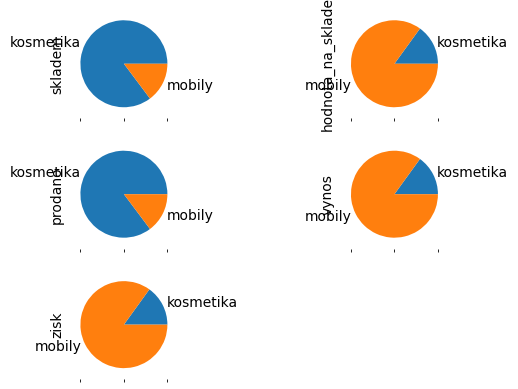

In [116]:
#skupiny[COL_SKLADEM].plot-pie()
skupiny.plot.pie(subplots=True,legend=False, layout=(3,2))

*2*. Počet produktů skladem   
*3*. Množství prodaných produktů  
*4*. Hodnotu produktů na skladě
-----------------------------------------------

In [118]:
produkty = sklad[[COL_PRODUKT, COL_SKLADEM, COL_HODNOTA, COL_VYNOS]] \
    .groupby(COL_PRODUKT).sum()
produkty

,skladem,hodnota_na_sklade,vynos
Produkt,,,
alcatel black,24,21287.34,21287.34
alcatel g,37,48560.93,48560.93
alcatel volcano,11,183766.71,183766.71
apple airpods,213,1363931.37,1363931.37
apple ipad,512,19511095.59,19511095.59
...,...,...,...
zte mf255v,158,265975.66,265975.66
zubní kartáček,165,22590.34,22590.34
zyxel vmg8623,20,207868.18,207868.18


<Axes: ylabel='Produkt'>

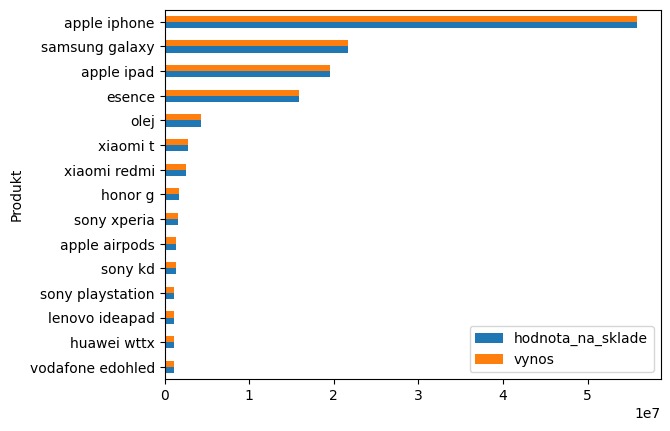

In [120]:
produkty[[COL_HODNOTA, COL_VYNOS]].sort_values(COL_HODNOTA).tail(15).plot.barh()

In [84]:
sklad[[COL_PRODUKT, COL_SKLADEM]].groupby(COL_PRODUKT).aggregate({
    COL_SKLADEM: 'sum'
}).sort_values(COL_SKLADEM,ascending=False).head(20)

#sklad[COL_SKLADEM].aggregate({
#    COL_SKLADEM: 'sum'
#})


,skladem
Produkt,
esence,21369
olej,5924
prasek,2566
apple iphone,890
samsung galaxy,889
balzám,562
apple ipad,512
aroma flakon,355
gel,302


In [85]:
sklad[[COL_PRODUKT, COL_PRODANO]].groupby(COL_PRODUKT).aggregate({
    COL_PRODANO: 'sum'
}).sort_values(COL_PRODANO,ascending=False).head(20)

#sklad[COL_PRODANO].aggregate({
#    COL_PRODANO: 'sum'
#})

,prodano
Produkt,
esence,38751
olej,11285
prasek,4536
apple iphone,2117
samsung galaxy,1681
balzám,1414
apple ipad,851
aroma flakon,572
xiaomi redmi,503


In [86]:
sklad[[COL_PRODUKT, COL_HODNOTA]].groupby(COL_PRODUKT).aggregate({
    COL_HODNOTA: 'sum'
}).sort_values(COL_HODNOTA,ascending=False).head(20)

#sklad[COL_HODNOTA].aggregate({
#    COL_HODNOTA: 'sum'
#})

,hodnota_na_sklade
Produkt,
apple iphone,55821722.36
samsung galaxy,21687498.62
apple ipad,19511095.59
esence,15837270.25
olej,4328482.13
xiaomi t,2731006.93
xiaomi redmi,2505195.31
honor g,1766212.93
sony xperia,1598293.35


*5*. TOP10 produktů podle výnosu
-------------------------------------------

In [124]:
top10_vynos = sklad[[COL_PRODUKT,COL_VYNOS]].groupby([COL_PRODUKT]).sum().sort_values([COL_VYNOS],ascending=False).head(10)
top10_vynos

,vynos
Produkt,
apple iphone,55821722.36
samsung galaxy,21687498.62
apple ipad,19511095.59
esence,15837270.25
olej,4328482.13
xiaomi t,2731006.93
xiaomi redmi,2505195.31
honor g,1766212.93
sony xperia,1598293.35


In [88]:
sklad.groupby(COL_PRODUKT).aggregate({
    COL_VYNOS: 'sum',
}).sort_values((COL_VYNOS),ascending=False).head(10)

,vynos
Produkt,
apple iphone,55821722.36
samsung galaxy,21687498.62
apple ipad,19511095.59
esence,15837270.25
olej,4328482.13
xiaomi t,2731006.93
xiaomi redmi,2505195.31
honor g,1766212.93
sony xperia,1598293.35


*6*. 10 nejméně a nejvíce ziskových produktů (v jedné tabulce)
---------------------------------------

In [125]:
top10_zisk = sklad[[COL_PRODUKT,COL_ZISK]].groupby([COL_PRODUKT]).sum().sort_values([COL_ZISK],ascending=False).head(10)
tail10_zisk = sklad[[COL_PRODUKT,COL_ZISK]].groupby([COL_PRODUKT]).sum().sort_values([COL_ZISK],ascending=False).tail(10)

pandas.concat([top10_zisk, tail10_zisk])

,zisk
Produkt,
apple iphone,9.708972e+06
samsung galaxy,3.470582e+06
esence,2.592560e+06
apple ipad,2.503406e+06
olej,7.379155e+05
xiaomi t,5.462014e+05
sony xperia,3.995733e+05
honor g,3.900818e+05
apple airpods,3.194581e+05


In [104]:
#sklad.groupby(COL_PRODUKT).aggregate({
#    COL_VYNOS: 'sum',
#}).sort_values((COL_VYNOS),ascending=False).tail(10)

#top_10 = sklad.groupby(COL_PRODUKT).aggregate({
#    COL_ZISK: 'sum'
#}).sort_values(COL_ZISK, ascending=True).head(10)

#bottom10 =  sklad.groupby(COL_PRODUKT).aggregate({
#    COL_ZISK: 'sum'
#}).sort_values(COL_ZISK, ascending=True).tail(10)

zisk_poradi = sklad.groupby(COL_PRODUKT).aggregate({
    COL_ZISK: 'sum'
}).sort_values(COL_ZISK, ascending=False)


pandas.concat([zisk_poradi.head(10),zisk_poradi.tail(10)])


,zisk
Produkt,
apple iphone,9.708972e+06
samsung galaxy,3.470582e+06
esence,2.592560e+06
apple ipad,2.503406e+06
olej,7.379155e+05
xiaomi t,5.462014e+05
sony xperia,3.995733e+05
honor g,3.900818e+05
apple airpods,3.194581e+05


*7*. Výnos z TOP10 proti celkovému výnosu (hodnoty i procentuální poměr)
--------------------------------

In [130]:
income_all = sklad[COL_VYNOS].sum()
income_top10 = top10_vynos[COL_VYNOS].sum()

print(f"Vynos skladu {income_all}, vynos TOP10 {income_top10}, pomer: {income_top10/income_all}")

Vynos skladu 150837250.37, vynos TOP10 127150708.84, pomer: 0.8429662336598055


<Axes: >

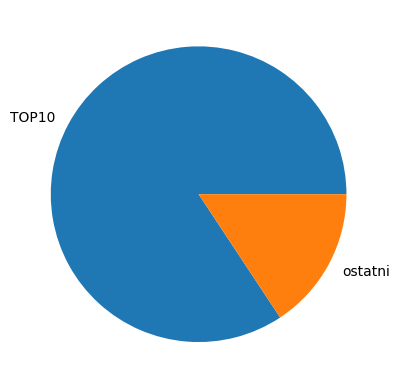

In [131]:
pandas.Series({'TOP10': income_top10, 'ostatni': (income_all-income_top10)}).plot.pie()

In [136]:
#sklad['marze'] = (sklad[COL_ZISK] - sklad[COL_VYNOS]) * 100


#aggregované po produktech
#neprintuje jen číselnou hodnotu, nevím proč

vynos_top5 = sklad.groupby(COL_PRODUKT).aggregate({
    COL_VYNOS: 'sum'
}).sort_values(COL_VYNOS, ascending=False).head(5).sum()

#print(vynos_top5)


vynos_celkem = sklad.groupby(COL_PRODUKT).aggregate({
    COL_VYNOS: 'sum'
}).sort_values(COL_VYNOS, ascending=False).sum()

#print(vynos_celkem)

rozdil = ((vynos_top5 / vynos_celkem) * 100)

#print(rozdil)

#print(f"vynos top 5 je: {vynos_top5}, vynos celkem je: {vynos_celkem}, % rozdíl je: {rozdil}")


vynos    77.690404
dtype: float64
